# Mnist numbers dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.layers import Input, Add, Dense, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


class H1Layer(Layer):
    def __init__(self, **kwargs):
        super(H1Layer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.b = self.add_weight(shape=(input_shape[-1],),
                                 initializer='random_normal',
                                 trainable=True)
        super(H1Layer, self).build(input_shape)

    def call(self, x):
        return self.b * (2 * x)
        #return (2 * x) 


class H2Layer(Layer):
    def __init__(self, h1, **kwargs):
        super(H2Layer, self).__init__(**kwargs)
        self.h1 = h1

    def call(self, x):
        return (2*x*(self.h1(x)))-2
    
class H3Layer(Layer):
    def __init__(self, h1, h2, **kwargs):
        super(H3Layer, self).__init__(**kwargs)
        self.h1 = h1
        self.h2 = h2
        
    def call(self, x):
        return (2*x*(self.h2(x)))-(4*self.h1(x))

class H4Layer(Layer):
    def __init__(self, h2, h3, **kwargs):
        super(H4Layer, self).__init__(**kwargs)
        self.h2 = h2
        self.h3 = h3

    def call(self, x):
        return (2*x*(self.h3(x)))-(6*self.h2(x))   
    
class H5Layer(Layer):
    def __init__(self, h3, h4, **kwargs):
        super(H5Layer,self).__init__(**kwargs)
        self.h3 = h3
        self.h4 = h4

    def call(self,x):
        return (2*x*(self.h4(x)))-(8*self.h3(x))
    
class H6Layer(Layer):
    def __init__(self, h4, h5, **kwargs):
        super(H6Layer,self).__init__(**kwargs)
        self.h4 = h4
        self.h5 = h5

    def call(self,x):
        return (2*x*(self.h5(x)))-(10*self.h4(x))

class TensorDecompositionLayer(Layer):
    def __init__(self, rank, **kwargs):
        self.rank = rank
        super(TensorDecompositionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.factors_a = self.add_weight(shape=(input_shape[-1], self.rank),
                                         initializer='random_normal',
                                         trainable=True)
        self.factors_b = self.add_weight(shape=(self.rank, input_shape[-1]),
                                         initializer='random_normal',
                                         trainable=True)
        super(TensorDecompositionLayer, self).build(input_shape)

    def call(self, x):
        return tf.matmul(tf.matmul(x, self.factors_a), self.factors_b)


def build_model(input_shape, filters):
    rank = 3
    input_layer = Input(shape=input_shape)
    x = input_layer

    x = Conv2D(filters, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128)(x)
    
    h1 = H1Layer()
    h2 = H2Layer(h1)
    h3 = H3Layer(h1, h2)
    h4 = H4Layer(h2, h3)
    
    x = h2(x)
    x = Dense(128)(x)
    x = TensorDecompositionLayer(rank)(x)
    x = h3(x)
    x = Dense(128)(x)
    x = TensorDecompositionLayer(rank)(x)
    x = h4(x)
    x = Dense(64)(x)
    x = TensorDecompositionLayer(rank)(x)
    
    output_layer = Dense(10, activation='softmax')(x)
    model = Model(inputs=input_layer, outputs=output_layer)

    return model 

# Load and preprocess the MNIST data
(X_train, y_train), (X_val, y_val) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_val = X_val.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)

input_shape = (28, 28, 1)
filters = 64
model_mnist = build_model(input_shape, filters)
optimizer = Adam(learning_rate=0.001)
model_mnist.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 64
epochs = 10

history = model_mnist.fit(X_train, y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          validation_data=(X_val, y_val))

val_loss, val_acc = model_mnist.evaluate(X_val, y_val, verbose=0)
print(f"Validation accuracy: {val_acc:.4f}")

# Visualize some sample predictions
num_test_samples = 10
indices = np.random.choice(len(X_val), num_test_samples)
X_test_samples = X_val[indices]
y_true_samples = np.argmax(y_val[indices], axis=1)
y_pred_samples = np.argmax(model_mnist.predict(X_test_samples), axis=1)

plt.figure(figsize=(15, 5))
for i in range(num_test_samples):
    plt.subplot(2, num_test_samples, i + 1)
    plt.imshow(X_test_samples[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"True: {y_true_samples[i]}\nPred: {y_pred_samples[i]}")
plt.tight_layout()
plt.show()


### Validation accuracy: 0.9746

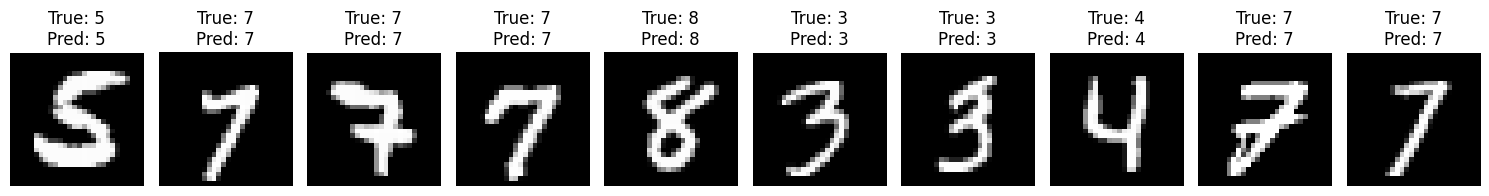

# Same architecture applied to CIFAR-10 Dataset

In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.layers import Input, Add, Dense, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


class H1Layer(Layer):
    def __init__(self, **kwargs):
        super(H1Layer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.b = self.add_weight(shape=(input_shape[-1],),
                                 initializer='random_normal',
                                 trainable=True)
        super(H1Layer, self).build(input_shape)

    def call(self, x):
        return self.b * (2 * x)
        #return (2 * x) 


class H2Layer(Layer):
    def __init__(self, h1, **kwargs):
        super(H2Layer, self).__init__(**kwargs)
        self.h1 = h1

    def call(self, x):
        return (2*x*(self.h1(x)))-2
    
class H3Layer(Layer):
    def __init__(self, h1, h2, **kwargs):
        super(H3Layer, self).__init__(**kwargs)
        self.h1 = h1
        self.h2 = h2
        
    def call(self, x):
        return (2*x*(self.h2(x)))-(4*self.h1(x))

class H4Layer(Layer):
    def __init__(self, h2, h3, **kwargs):
        super(H4Layer, self).__init__(**kwargs)
        self.h2 = h2
        self.h3 = h3

    def call(self, x):
        return (2*x*(self.h3(x)))-(6*self.h2(x))   
    
class H5Layer(Layer):
    def __init__(self, h3, h4, **kwargs):
        super(H5Layer,self).__init__(**kwargs)
        self.h3 = h3
        self.h4 = h4

    def call(self,x):
        return (2*x*(self.h4(x)))-(8*self.h3(x))
    
class H6Layer(Layer):
    def __init__(self, h4, h5, **kwargs):
        super(H6Layer,self).__init__(**kwargs)
        self.h4 = h4
        self.h5 = h5

    def call(self,x):
        return (2*x*(self.h5(x)))-(10*self.h4(x))

class TensorDecompositionLayer(Layer):
    def __init__(self, rank, **kwargs):
        self.rank = rank
        super(TensorDecompositionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.factors_a = self.add_weight(shape=(input_shape[-1], self.rank),
                                         initializer='random_normal',
                                         trainable=True)
        self.factors_b = self.add_weight(shape=(self.rank, input_shape[-1]),
                                         initializer='random_normal',
                                         trainable=True)
        super(TensorDecompositionLayer, self).build(input_shape)

    def call(self, x):
        return tf.matmul(tf.matmul(x, self.factors_a), self.factors_b)


def build_model(input_shape, filters):
    rank = 3
    input_layer = Input(shape=input_shape)
    x = input_layer

    x = Conv2D(filters, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    
    h1 = H1Layer()
    h2 = H2Layer(h1)
    h3 = H3Layer(h1, h2)
    h4 = H4Layer(h2, h3)
    
    x = h2(x)
    x = Dense(128, activation='relu')(x)
    x = TensorDecompositionLayer(rank)(x)
    x = h3(x)
    x = Dense(128, activation='relu')(x)
    x = TensorDecompositionLayer(rank)(x)
    x = h4(x)
    x = Dense(64, activation='relu')(x)
    x = TensorDecompositionLayer(rank)(x)
    
    output_layer = Dense(10, activation='softmax')(x)
    model = Model(inputs=input_layer, outputs=output_layer)

    return model 
# Load and preprocess the CIFAR-10 data
(X_train, y_train), (X_val, y_val) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)

input_shape = (32, 32, 3)  # CIFAR-10 images are 32x32 RGB images
filters = 64
model_cifar = build_model(input_shape, filters)
optimizer = Adam(learning_rate=0.001)
model_cifar.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


batch_size = 64
epochs = 10

history = model_cifar.fit(X_train, y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          validation_data=(X_val, y_val))

val_loss, val_acc = model_cifar.evaluate(X_val, y_val, verbose=0)
print(f"Validation accuracy: {val_acc:.4f}")

# Visualize some sample predictions
num_test_samples = 10
indices = np.random.choice(len(X_val), num_test_samples)
X_test_samples = X_val[indices]
y_true_samples = np.argmax(y_val[indices], axis=1)
y_pred_samples = np.argmax(model_cifar.predict(X_test_samples), axis=1)

plt.figure(figsize=(15, 5))
for i in range(num_test_samples):
    plt.subplot(2, num_test_samples, i + 1)
    plt.imshow(X_test_samples[i])
    plt.axis('off')
    plt.title(f"True: {y_true_samples[i]}\nPred: {y_pred_samples[i]}")
plt.tight_layout()
plt.show()


### Validation accuracy: 0.5726

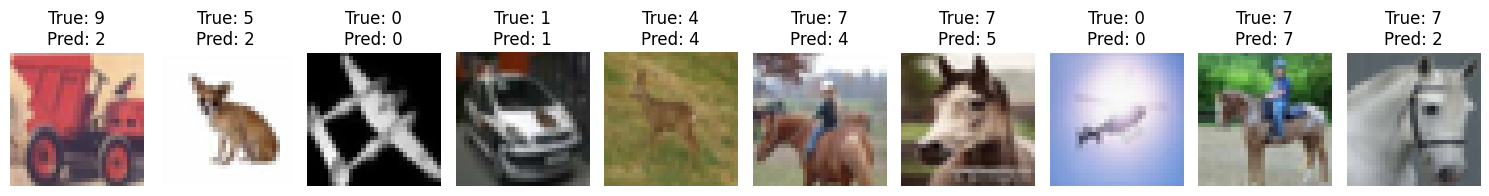

# More depth applied for CIFAR-10 Dataset
### More epochs to get better results

In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D,BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.layers import Input, Add, Dense, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


class H1Layer(Layer):
    def __init__(self, **kwargs):
        super(H1Layer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.b = self.add_weight(shape=(input_shape[-1],),
                                 initializer='random_normal',
                                 trainable=True)
        super(H1Layer, self).build(input_shape)

    def call(self, x):
        return self.b * (2 * x)
        #return (2 * x) 


class H2Layer(Layer):
    def __init__(self, h1, **kwargs):
        super(H2Layer, self).__init__(**kwargs)
        self.h1 = h1

    def call(self, x):
        return (2*x*(self.h1(x)))-2
    
class H3Layer(Layer):
    def __init__(self, h1, h2, **kwargs):
        super(H3Layer, self).__init__(**kwargs)
        self.h1 = h1
        self.h2 = h2
        
    def call(self, x):
        return (2*x*(self.h2(x)))-(4*self.h1(x))

class H4Layer(Layer):
    def __init__(self, h2, h3, **kwargs):
        super(H4Layer, self).__init__(**kwargs)
        self.h2 = h2
        self.h3 = h3

    def call(self, x):
        return (2*x*(self.h3(x)))-(6*self.h2(x))   
    
class H5Layer(Layer):
    def __init__(self, h3, h4, **kwargs):
        super(H5Layer,self).__init__(**kwargs)
        self.h3 = h3
        self.h4 = h4

    def call(self,x):
        return (2*x*(self.h4(x)))-(8*self.h3(x))
    
class H6Layer(Layer):
    def __init__(self, h4, h5, **kwargs):
        super(H6Layer,self).__init__(**kwargs)
        self.h4 = h4
        self.h5 = h5

    def call(self,x):
        return (2*x*(self.h5(x)))-(10*self.h4(x))

class TensorDecompositionLayer(Layer):
    def __init__(self, rank, **kwargs):
        self.rank = rank
        super(TensorDecompositionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.factors_a = self.add_weight(shape=(input_shape[-1], self.rank),
                                         initializer='random_normal',
                                         trainable=True)
        self.factors_b = self.add_weight(shape=(self.rank, input_shape[-1]),
                                         initializer='random_normal',
                                         trainable=True)
        super(TensorDecompositionLayer, self).build(input_shape)

    def call(self, x):
        return tf.matmul(tf.matmul(x, self.factors_a), self.factors_b)


def build_model(input_shape, filters):
    rank = 3
    input_layer = Input(shape=input_shape)
    x = input_layer

    # First Conv Block
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = Dropout(0.25)(x)  # Added dropout here
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)


    # Second Conv Block
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = Dropout(0.25)(x)  # Added dropout here
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    # Third Conv Block
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = Dropout(0.25)(x)  # Added dropout here
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Flatten()(x)
    x = Dense(128)(x)
    
    h1 = H1Layer()
    h2 = H2Layer(h1)
    h3 = H3Layer(h1, h2)
    h4 = H4Layer(h2, h3)
    
    x = h2(x)
    x = Dense(128)(x)
    x = TensorDecompositionLayer(rank)(x)
    x = h3(x)
    x = Dense(128)(x)
    x = TensorDecompositionLayer(rank)(x)
    x = h4(x)
    x = Dense(64)(x)
    x = TensorDecompositionLayer(rank)(x)
    
    output_layer = Dense(10, activation='softmax')(x)
    model = Model(inputs=input_layer, outputs=output_layer)

    return model 
# Load and preprocess the CIFAR-10 data
(X_train, y_train), (X_val, y_val) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)

input_shape = (32, 32, 3)  # CIFAR-10 images are 32x32 RGB images
filters = 64
model_cifar = build_model(input_shape, filters)
optimizer = Adam(learning_rate=0.001)
model_cifar.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


batch_size = 64
epochs = 50

history = model_cifar.fit(X_train, y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          validation_data=(X_val, y_val))

val_loss, val_acc = model_cifar.evaluate(X_val, y_val, verbose=0)
print(f"Validation accuracy: {val_acc:.4f}")

# Visualize some sample predictions
num_test_samples = 10
indices = np.random.choice(len(X_val), num_test_samples)
X_test_samples = X_val[indices]
y_true_samples = np.argmax(y_val[indices], axis=1)
y_pred_samples = np.argmax(model_cifar.predict(X_test_samples), axis=1)

plt.figure(figsize=(15, 5))
for i in range(num_test_samples):
    plt.subplot(2, num_test_samples, i + 1)
    plt.imshow(X_test_samples[i])
    plt.axis('off')
    plt.title(f"True: {y_true_samples[i]}\nPred: {y_pred_samples[i]}")
plt.tight_layout()
plt.show()


### Validation accuracy: 0.6585


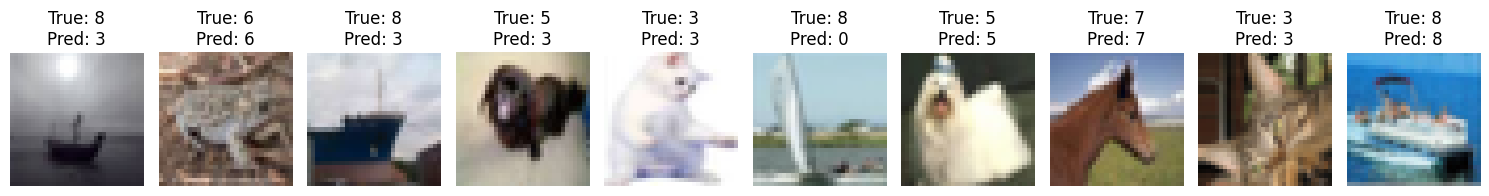